# Problem Set 1 - Neural network implementation

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [64]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork
from scratch.utils import *

In [65]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A) Neural Network Classifier from Scratch

### Data

In [66]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



### ML Model & Training

In [67]:
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=50)
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

Epoch: 1, Training Time: 0.31s, Training Accuracy: 23.62%, Validation Accuracy: 22.00%
Epoch: 2, Training Time: 0.67s, Training Accuracy: 28.75%, Validation Accuracy: 29.00%
Epoch: 3, Training Time: 0.97s, Training Accuracy: 36.00%, Validation Accuracy: 33.50%
Epoch: 4, Training Time: 1.25s, Training Accuracy: 45.25%, Validation Accuracy: 39.50%
Epoch: 5, Training Time: 1.52s, Training Accuracy: 54.00%, Validation Accuracy: 49.00%
Epoch: 6, Training Time: 1.82s, Training Accuracy: 60.00%, Validation Accuracy: 56.00%
Epoch: 7, Training Time: 2.11s, Training Accuracy: 65.75%, Validation Accuracy: 61.00%
Epoch: 8, Training Time: 2.39s, Training Accuracy: 69.12%, Validation Accuracy: 65.50%
Epoch: 9, Training Time: 2.70s, Training Accuracy: 70.75%, Validation Accuracy: 67.00%
Epoch: 10, Training Time: 2.98s, Training Accuracy: 72.25%, Validation Accuracy: 68.00%
Epoch: 11, Training Time: 3.25s, Training Accuracy: 73.62%, Validation Accuracy: 70.50%
Epoch: 12, Training Time: 3.52s, Training

### Test cosine annealing scheduler

In [68]:
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

Epoch: 1, Training Time: 0.34s, Training Accuracy: 88.50%, Validation Accuracy: 80.00%
Epoch: 2, Training Time: 0.60s, Training Accuracy: 88.50%, Validation Accuracy: 79.50%
Epoch: 3, Training Time: 0.87s, Training Accuracy: 88.50%, Validation Accuracy: 79.50%
Epoch: 4, Training Time: 1.12s, Training Accuracy: 88.75%, Validation Accuracy: 79.50%
Epoch: 5, Training Time: 1.38s, Training Accuracy: 88.75%, Validation Accuracy: 79.00%
Epoch: 6, Training Time: 1.64s, Training Accuracy: 88.88%, Validation Accuracy: 79.00%
Epoch: 7, Training Time: 1.91s, Training Accuracy: 88.88%, Validation Accuracy: 79.00%
Epoch: 8, Training Time: 2.19s, Training Accuracy: 88.75%, Validation Accuracy: 79.00%
Epoch: 9, Training Time: 2.45s, Training Accuracy: 88.75%, Validation Accuracy: 80.00%
Epoch: 10, Training Time: 2.72s, Training Accuracy: 88.75%, Validation Accuracy: 80.00%
Epoch: 11, Training Time: 2.99s, Training Accuracy: 89.00%, Validation Accuracy: 79.50%
Epoch: 12, Training Time: 3.24s, Training

### Test residual neural network

In [77]:
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=.1, epochs=50)
res_nn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.28s, Training Accuracy: 15.75%, Validation Accuracy: 13.50%
Epoch: 2, Training Time: 0.57s, Training Accuracy: 30.38%, Validation Accuracy: 24.50%
Epoch: 3, Training Time: 0.86s, Training Accuracy: 40.50%, Validation Accuracy: 36.00%
Epoch: 4, Training Time: 1.14s, Training Accuracy: 51.38%, Validation Accuracy: 49.00%
Epoch: 5, Training Time: 1.43s, Training Accuracy: 59.50%, Validation Accuracy: 57.50%
Epoch: 6, Training Time: 1.73s, Training Accuracy: 66.25%, Validation Accuracy: 67.50%
Epoch: 7, Training Time: 2.01s, Training Accuracy: 72.00%, Validation Accuracy: 71.00%
Epoch: 8, Training Time: 2.29s, Training Accuracy: 75.62%, Validation Accuracy: 74.50%
Epoch: 9, Training Time: 2.58s, Training Accuracy: 79.50%, Validation Accuracy: 76.50%
Epoch: 10, Training Time: 2.86s, Training Accuracy: 81.00%, Validation Accuracy: 78.00%
Epoch: 11, Training Time: 3.16s, Training Accuracy: 82.25%, Validation Accuracy: 80.50%
Epoch: 12, Training Time: 3.45s, Training

## B) Neural Network Classifier using Torch

### Data

In [73]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


### ML Model & Training

In [75]:
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.2, epochs=50, random_state=GLOBAL_RANDOM_STATE)
torch_nn.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.95s, Learning Rate: 0.2, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 2, Training Time: 1.88s, Learning Rate: 0.2, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 3, Training Time: 2.80s, Learning Rate: 0.2, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 4, Training Time: 3.73s, Learning Rate: 0.2, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 5, Training Time: 4.65s, Learning Rate: 0.2, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 6, Training Time: 5.57s, Learning Rate: 0.2, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 7, Training Time: 6.49s, Learning Rate: 0.2, Training Accuracy: 17.70%, Validation Accuracy: 12.00%
Epoch: 8, Training Time: 7.41s, Learning Rate: 0.2, Training Accuracy: 21.10%, Validation Accuracy: 20.60%
Epoch: 9, Training Time: 8.34s, Learning Rate: 0.2, Training Accuracy: 29.10%, Validation Accuracy: 25.80%
Epoch: 10, Training Time: 9.25s, Learning R

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

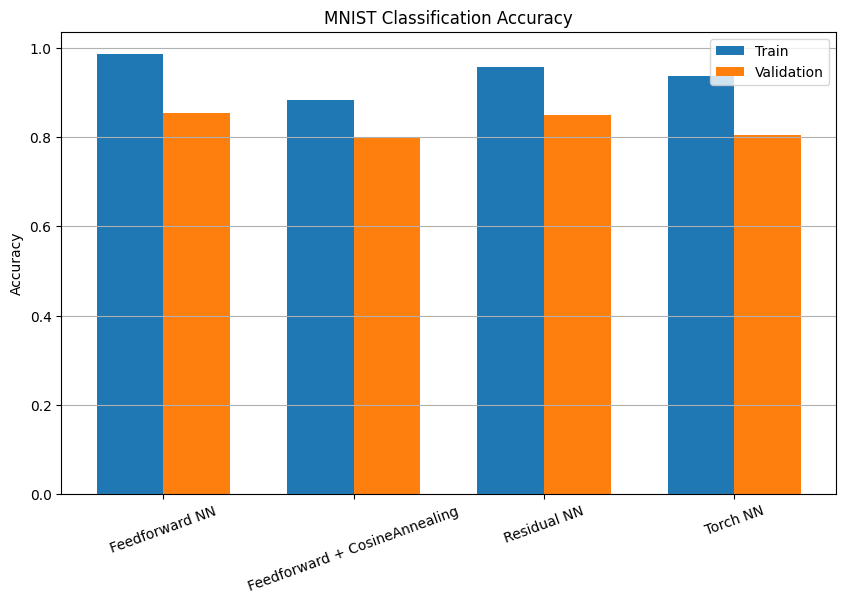

In [78]:
### BEGIN SOLUTION ###
 
#Compute accuracies for all the models
fnn_train_acc = float(fnn.compute_accuracy(x_train, y_train))
fnn_val_acc = float(fnn.compute_accuracy(x_val, y_val))

fnn_cosine_train_acc = float(fnn_cosine.compute_accuracy(x_train, y_train))
fnn_cosine_val_acc = float(fnn_cosine.compute_accuracy(x_val, y_val))

res_nn_train_acc = float(res_nn.compute_accuracy(x_train, y_train))
res_nn_val_acc = float(res_nn.compute_accuracy(x_val, y_val))

torch_train_acc = torch_nn.predict(train_loader)  
torch_val_acc = torch_nn.predict(val_loader)

#Build dictionary
results = {
    "Feedforward NN": (fnn_train_acc, fnn_val_acc),
    "Feedforward + CosineAnnealing": (fnn_cosine_train_acc, fnn_cosine_val_acc),
    "Residual NN": (res_nn_train_acc, res_nn_val_acc),
    "Torch NN": (torch_train_acc, torch_val_acc)
}

#Plot


models = list(results.keys())
train_accs = [results[m][0] for m in models]
val_accs = [results[m][1] for m in models]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_accs, width, label='Train')
plt.bar(x + width/2, val_accs, width, label='Validation')

plt.xticks(x, models, rotation=20)
plt.ylabel("Accuracy")
plt.title("MNIST Classification Accuracy")
plt.legend()
plt.grid(axis='y')
plt.show()


### END SOLUTION ###